# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'left')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
Count=len(combined_data["Mouse ID"].unique())

print(f"There is a total of {Count} mice in the study")

There is a total of 249 mice in the study


In [5]:
duplicate = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID",'Timepoint']),"Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# clean = combined_data[combined_data['Mouse ID'].isin(duplicate)==False]
# clean.head()
clean = combined_data.sort_values('Tumor Volume (mm3)',ascending=True).drop_duplicates('Mouse ID',keep='last')
clean.head


<bound method NDFrame.head of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
938      h428     Ketapril  Female           1          27          0   
1583     u153     Ceftamin  Female          11          25          0   
752      d133    Zoniferol    Male           5          30          0   
1753     x336     Naftisol  Female           4          29          0   
1743     x226     Ceftamin    Male          23          28          0   
...       ...          ...     ...         ...         ...        ...   
1571     t724     Naftisol  Female           2          25         45   
1179     m269     Stelasyn  Female          22          28         45   
1354     p189     Ketapril    Male           8          28         45   
1152     l725     Naftisol  Female           8          26         45   
1277     o331     Ketapril    Male          24          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
938            45.000000                 0  
158

In [7]:
print(len(clean))

249


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [8]:
drug = clean.loc[:,['Mouse ID','Tumor Volume (mm3)','Drug Regimen']]
drug.head()

,Mouse ID,Tumor Volume (mm3),Drug Regimen
938,h428,45.0,Ketapril
1583,u153,45.0,Ceftamin
752,d133,45.0,Zoniferol
1753,x336,45.0,Naftisol
1743,x226,45.0,Ceftamin


In [9]:
mean=drug.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=drug.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=drug.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=drug.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=drug.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Variance":variance, "Tumor Volume std. Dev": sd, "Tumor Volume Std. Err.": sem})
analysis


,Mean Tumor Volume,Median Tumor Volume,Variance,Tumor Volume std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,46.119199,45.893720,1.019059,1.009485,0.201897
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.525392,60.165180,61.216264,7.824082,1.564816
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,45.678645,45.521875,0.587093,0.766220,0.153244
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
analysis = analysis.round(2)
analysis

,Mean Tumor Volume,Median Tumor Volume,Variance,Tumor Volume std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,46.12,45.89,1.02,1.01,0.20
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.53,60.17,61.22,7.82,1.56
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,45.68,45.52,0.59,0.77,0.15
Stelasyn,61.00,62.19,90.33,9.50,1.94


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

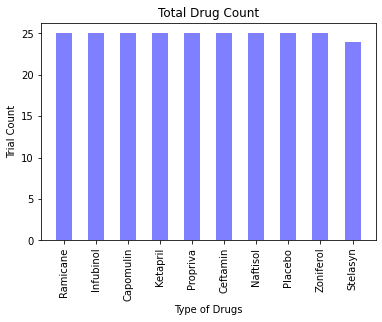

In [67]:
drug_count = clean['Drug Regimen'].value_counts()
y_axis=drug_count.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_count.index
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)
plt.xticks(rotation=90)
plt.ylabel("Trial Count")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)
plt.show()

In [14]:
tested_mice = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
tested_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

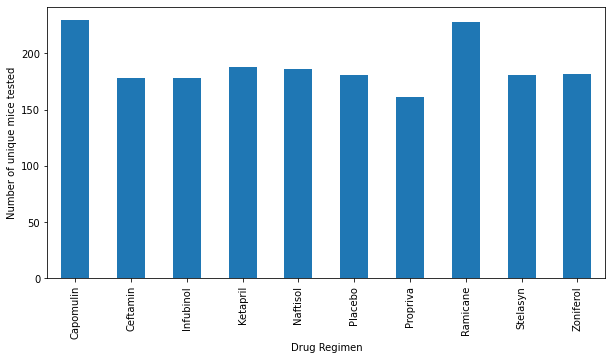

<Figure size 432x288 with 0 Axes>

In [13]:
tested_mice.plot(kind="bar", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")
plt.show()
plt.tight_layout()


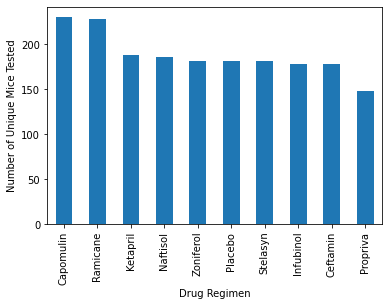

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = clean['Regimen'].value_counts

Text(0, 0.5, 'Data Points')

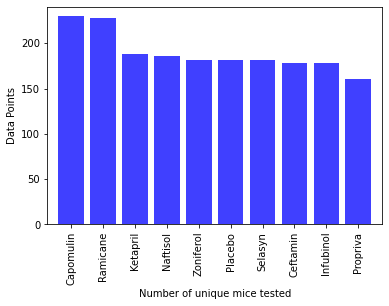

In [20]:
mice =[230,228,188,186,182,181,181,178,178,161]

x_axis = np.arange(len(tested_mice))
plt.bar(x_axis, mice, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo',
                           'Selasyn','Ceftamin','Infubinol','Propriva'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice)+10)

plt.xlabel("Number of unique mice tested")
plt.ylabel("Data Points")

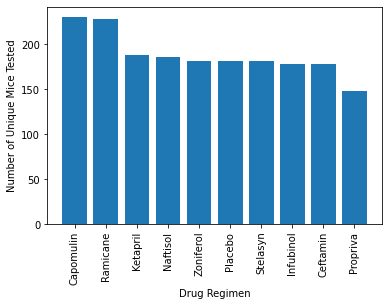

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.


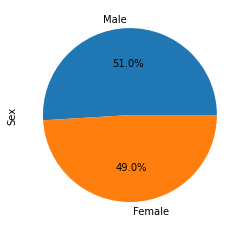

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


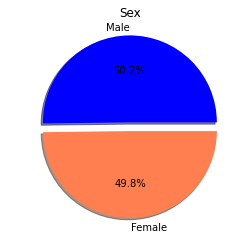

In [21]:
mf_count=clean["Sex"].value_counts()

#Labels for each section
labels=mf_count.values

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["blue", "coral"]

#Exploiding the male column

explode=[0.1,0]

#Make into a pie chart

mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

#Formatting
plt.title("Sex")
plt.ylabel(" ")
plt.show()

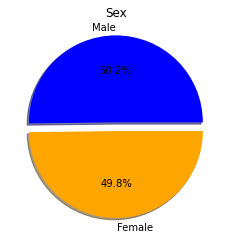

In [75]:
mf_count=clean["Sex"].value_counts()
labels=mf_count.index
sizes=mf_count.values
colors=["blue", "orange"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Sex")
plt.show()

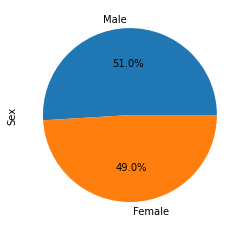

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
treatment = treatment.sort_values(["Timepoint"], ascending=True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_data = treatment[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


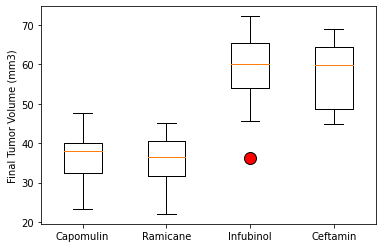

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

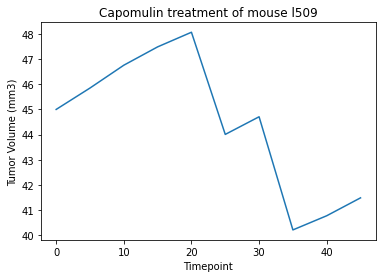

In [32]:
capomulin_table= combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
mouse= combined_data.loc[combined_data['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

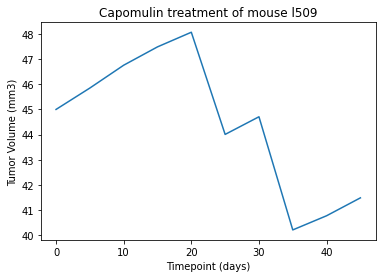

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

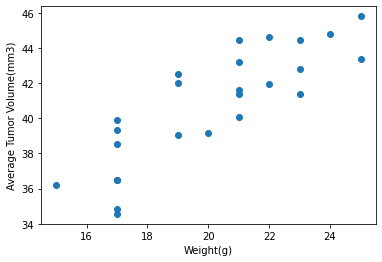

In [35]:
capomulin_weight= combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
mouse= combined_data.loc[combined_data['Mouse ID'] == 'l509']

avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(avg["Weight (g)"], avg["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()


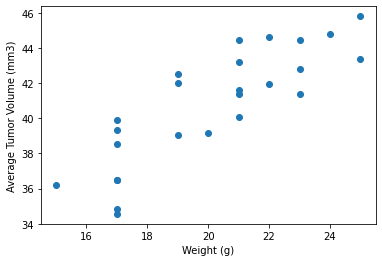

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


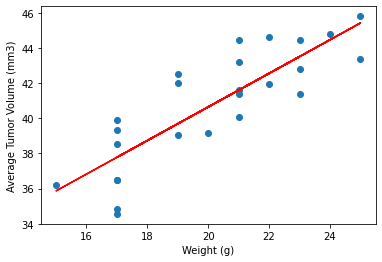

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [37]:
corr=round(st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [ ]:
x_values = avg['Weight (g)']
y_values = avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()